In [1]:
import geopandas as gpd
import pandas as pd

# random coordinates
gdf_1 = gpd.GeoDataFrame(geometry=gpd.points_from_xy([0, 0, 0], [0, 90, 120]))
gdf_2 = gpd.GeoDataFrame(geometry=gpd.points_from_xy([0, 0], [0, -90]))

gdf_1.geometry.apply(lambda g: gdf_2.distance(g))

,0,1
0,0.0,90.0
1,90.0,180.0
2,120.0,210.0


In [7]:
gdf_1.geometry.apply(lambda g: gdf_1.distance(g))

,0,1,2
0,0.0,90.0,120.0
1,90.0,0.0,30.0
2,120.0,30.0,0.0


In [8]:
gdf_1.geometry.apply(lambda g: gdf_1.distance(g)).median(axis=0)

0    90.0
1    30.0
2    30.0
dtype: float64

In [2]:
clinics = gpd.read_file('/home/jupyter-student/behavioralHealth.shp')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


<Axes: >

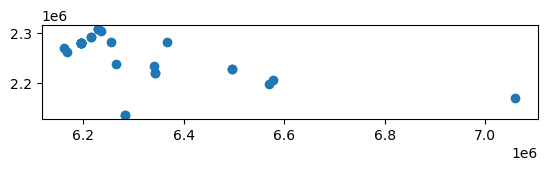

In [3]:
clinics.plot()

In [4]:
socal = gpd.read_parquet('/home/jupyter-student/data/scag_region.parquet')

In [5]:
socal.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
socal = socal.to_crs(clinics.crs)

In [7]:
rc = socal[socal.geoid.str.startswith("06065")]

<Axes: >

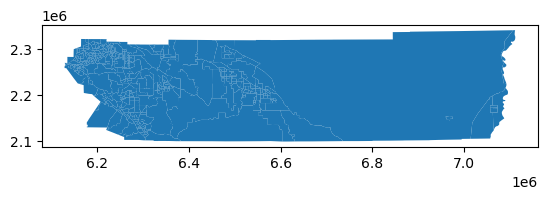

In [8]:
rc.plot()

In [9]:
rc.shape

(453, 194)

In [10]:
rc.geometry.apply(lambda g: clinics.distance(g)).median(axis=0)

0     104070.136497
1     110145.422279
2     118486.478639
3     780106.703273
4     109999.756757
5     110145.422279
6      93068.512487
7     127360.564230
8     110274.481746
9     130577.585244
10    110145.422279
11    303743.579448
12    110145.422279
13    162687.749002
14    110501.825357
15    226157.792611
16    130575.090996
17     86833.101138
18    128491.121930
19    162684.638468
20    145278.329356
21    226161.334468
22    299007.725394
23    105090.401115
24    110146.607263
25    104067.484478
26    110501.616968
27    110499.112055
dtype: float64

In [11]:
clinics.geometry.apply(lambda g: rc.distance(g)).median(axis=0)

171      35414.497106
172      57404.024199
173      70444.292093
174      59916.246444
175      65899.907435
            ...      
4559     51754.814636
4560     69235.098968
4568    121785.198080
4569    147379.220664
4578    261177.893498
Length: 453, dtype: float64

In [12]:
clinics.geometry.apply(lambda g: rc.distance(g)).min(axis=0)

171     17587.507322
172         0.000000
173     11703.070730
174      6093.825933
175     10885.748131
            ...     
4559    23468.056401
4560    14504.796947
4568    45895.492409
4569     3988.154669
4578    10834.765951
Length: 453, dtype: float64

In [13]:
clinics['cent'] = clinics.centroid

In [14]:
rc['cent'] = rc.centroid

/opt/tljh/user/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
rc.set_geometry('cent', inplace=True)

<Axes: >

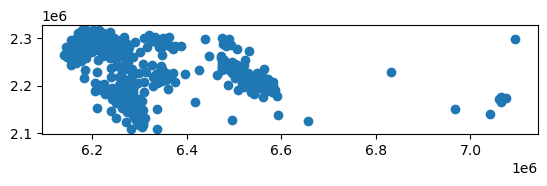

In [17]:
rc.plot()

In [18]:
clinics.geometry.apply(lambda g: rc.distance(g)).min(axis=0)

171     23599.208237
172      3019.158172
173     14930.591185
174      7500.806546
175     17330.260026
            ...     
4559    27631.243530
4560    16783.956907
4568    50460.359167
4569     6795.067162
4578    14591.568700
Length: 453, dtype: float64

In [19]:
rc['dist'] = clinics.geometry.apply(lambda g: rc.distance(g)).min(axis=0)

/opt/tljh/user/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
rc.set_geometry('geometry', inplace=True)

In [21]:
rc.per_capita_income

171     41397.573034
172     19270.082397
173     24544.962547
174     12246.346442
175     16792.718165
            ...     
4559    19985.523408
4560    34261.675094
4568    25011.033708
4569    14872.897004
4578    22086.110487
Name: per_capita_income, Length: 453, dtype: float64

<Axes: >

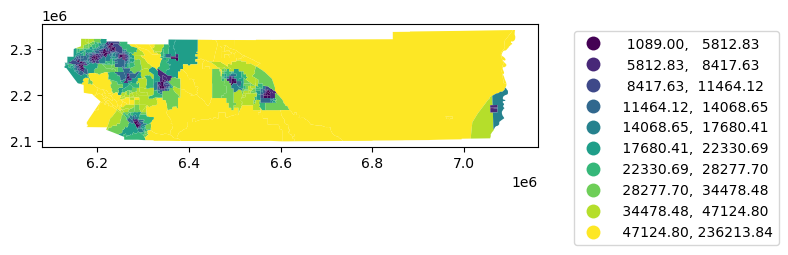

In [22]:
rc.plot(column='dist', scheme='quantiles',k=10, legend=True,
       legend_kwds={'bbox_to_anchor': (1.5, 1)})

### Alternative with sjoin

First with polygon to clinic

In [23]:
nq = gpd.sjoin_nearest(rc, clinics, distance_col='distance_to_clinic')

In [24]:
nq.shape

(465, 206)

In [25]:
rc.shape

(453, 196)

In [26]:
nq[['geoid', 'distance_to_clinic']].groupby(by='geoid').min()

,distance_to_clinic
geoid,
06065030101,1768.344059
06065030103,3928.348106
06065030104,3284.836973
06065030200,7529.946188
06065030300,5266.871283
...,...
06065941300,29557.523443
06065941400,22685.975067
06065941500,14832.118828


In [27]:
nq = nq[['geoid', 'distance_to_clinic']].groupby(by='geoid').max()
nq.reset_index(inplace=True)

In [28]:
nq.shape

(453, 2)

In [162]:
nq.head()

,geoid,distance_to_clinic
0,06065030101,1768.344059
1,06065030103,3928.348106
2,06065030104,3284.836973
3,06065030200,7529.946188
4,06065030300,5266.871283


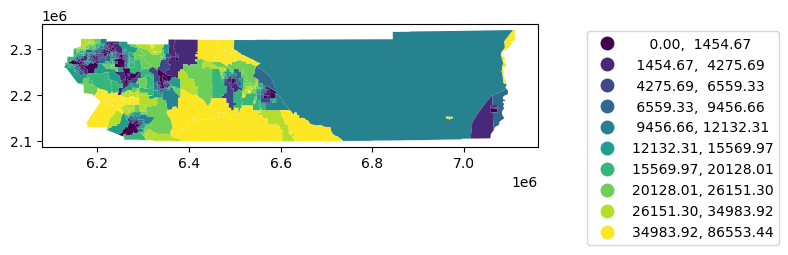

In [29]:
res = rc.merge(nq, left_on='geoid', right_on='geoid')

res.plot('distance_to_clinic', scheme='quantiles', k=10, legend=True,
        legend_kwds={'bbox_to_anchor': (1.5, 1)});

## now on centroids of tracts

In [30]:
rc.centroid

171     POINT (6228927.025 2271856.585)
172     POINT (6232768.433 2305432.441)
173     POINT (6267251.000 2290261.360)
174     POINT (6257557.755 2288526.028)
175     POINT (6263055.600 2265924.366)
                     ...               
4559    POINT (6174619.367 2298965.242)
4560    POINT (6159739.434 2285871.688)
4568    POINT (6286719.240 2191439.849)
4569    POINT (6348755.310 2217649.506)
4578    POINT (6485172.924 2237980.191)
Length: 453, dtype: geometry

/opt/tljh/user/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

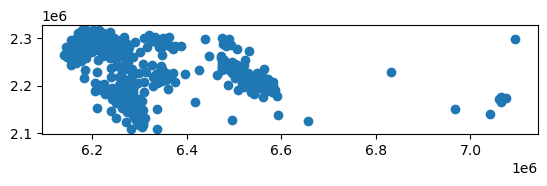

In [31]:
rc['centroid'] = rc.centroid
rc = rc.set_geometry('centroid')
rc.plot()

In [32]:
nq = gpd.sjoin_nearest(rc, clinics, distance_col='distance_to_clinic')
nq.shape

(453, 207)

In [34]:
nq[['geoid', 'distance_to_clinic']].groupby(by='geoid').min()

,distance_to_clinic
geoid,
06065030101,2532.133821
06065030103,6435.915812
06065030104,7886.872071
06065030200,13082.177204
06065030300,10765.815358
...,...
06065941300,33303.132676
06065941400,26309.841401
06065941500,29645.998724


In [35]:
nq = nq[['geoid', 'distance_to_clinic']].groupby(by='geoid').min()

In [36]:
nq.reset_index(inplace=True)

<Axes: >

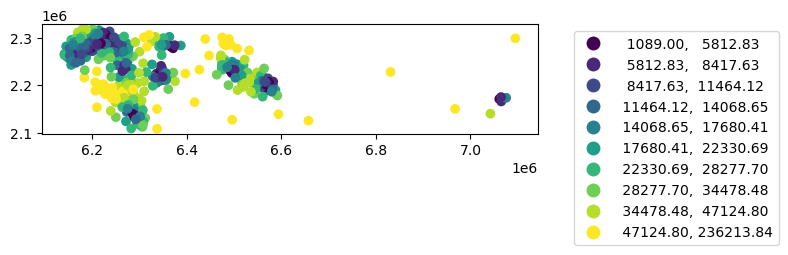

In [37]:
res = rc.merge(nq, left_on='geoid', right_on='geoid')

res.plot('distance_to_clinic', scheme='quantiles', k=10, legend=True,
        legend_kwds={'bbox_to_anchor': (1.5, 1)})

In [38]:
res = res.set_geometry('geometry')

<Axes: >

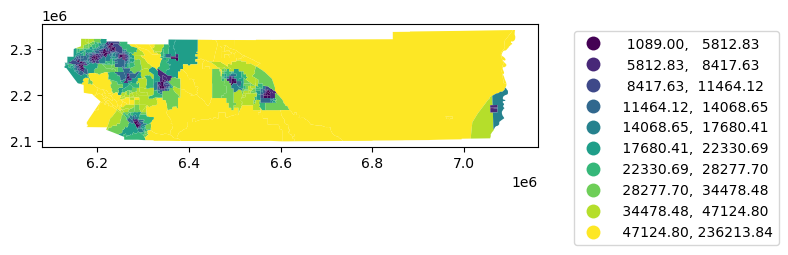

In [39]:
res.plot('distance_to_clinic', scheme='quantiles', k=10, legend=True,
        legend_kwds={'bbox_to_anchor': (1.5, 1)})

In [40]:
import seaborn

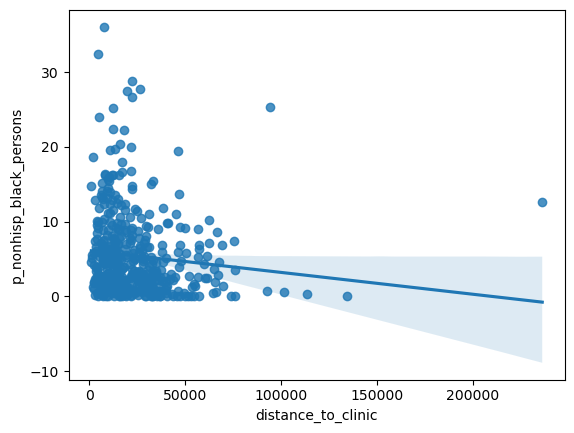

In [41]:
_ = seaborn.regplot(x='distance_to_clinic', y='p_nonhisp_black_persons', data=res)

In [181]:
res[['distance_to_clinic', 'per_capita_income', 'p_nonhisp_black_persons']].corr()

,distance_to_clinic,per_capita_income,p_nonhisp_black_persons
distance_to_clinic,1.000000,0.119891,-0.108220
per_capita_income,0.119891,1.000000,-0.235644
p_nonhisp_black_persons,-0.108220,-0.235644,1.000000


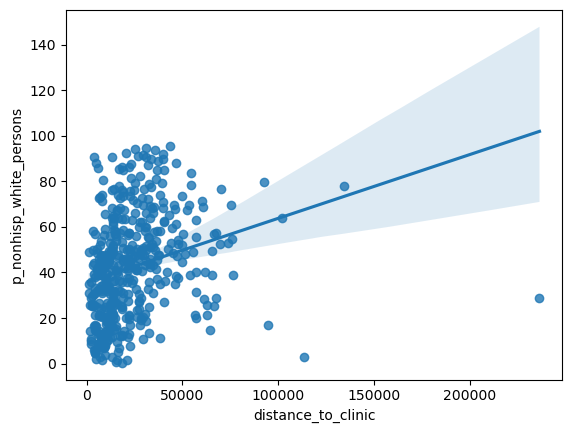

In [182]:
_ = seaborn.regplot(x='distance_to_clinic', y='p_nonhisp_white_persons', data=res)

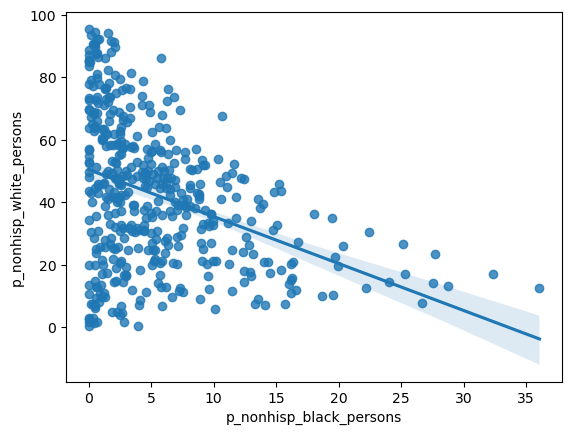

In [183]:
_ = seaborn.regplot(x='p_nonhisp_black_persons', y='p_nonhisp_white_persons', data=res)

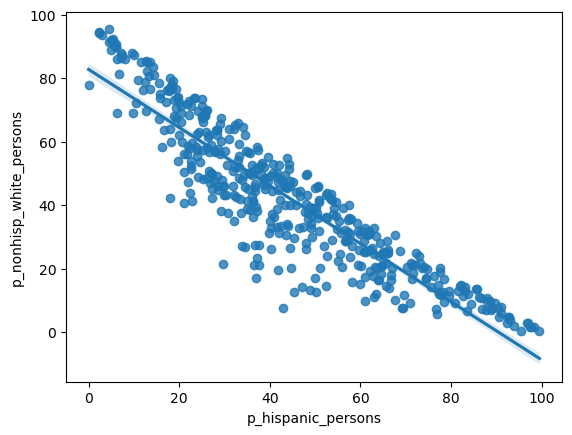

In [28]:
_ = seaborn.regplot(x='p_hispanic_persons', y='p_nonhisp_white_persons', data=rc)

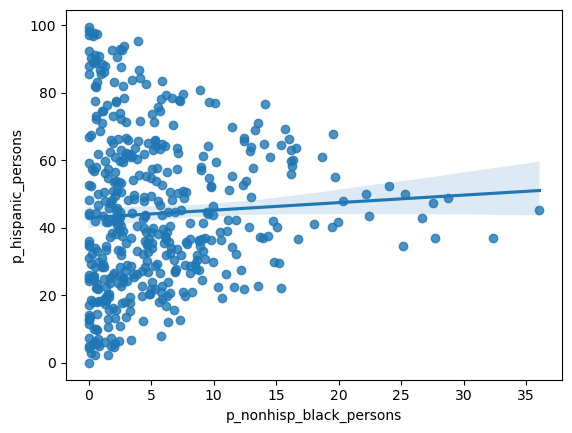

In [29]:
_ = seaborn.regplot(x='p_nonhisp_black_persons', y='p_hispanic_persons', data=rc)